In [1]:
import pandas as pd

In [2]:
d=pd.read_csv('clinical_notes_diagnosis_prediction_5000.csv')

In [3]:
d

,Clinical Notes,Diagnosis
0,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease
1,A 55-year-old male with a history of heavy alc...,Liver Cirrhosis
2,A 50-year-old male with a history of diabetes ...,Septic Shock
3,"A 35-year-old male presents with heartburn, re...",Gastroesophageal Reflux Disease
4,A 55-year-old female with a history of obesity...,Type 2 Diabetes Mellitus
...,...,...
4995,A 55-year-old male with a history of heavy alc...,Liver Cirrhosis
4996,"A 40-year-old female presents with swelling, p...",Deep Vein Thrombosis
4997,A 55-year-old male with a history of heavy alc...,Liver Cirrhosis
4998,"A 40-year-old female presents with swelling, p...",Deep Vein Thrombosis


In [4]:
d['Clinical Notes'][10]

'A 55-year-old female with a history of obesity and hypertension presents for a routine check-up. She reports increased thirst, frequent urination, and fatigue over the past few months. On examination, the patient is overweight with a BMI of 32. Blood work shows elevated fasting blood glucose levels of 180 mg/dL. HbA1c levels are 7.5%. The patient is diagnosed with type 2 diabetes and is started on metformin.'

In [5]:
d['Diagnosis'].value_counts()

,count
Diagnosis,
Peptic Ulcer Disease,284
Type 2 Diabetes Mellitus,283
Acute Myocardial Infarction,272
Chronic Obstructive Pulmonary Disease,269
Cerebrovascular Accident,263
Deep Vein Thrombosis,260
Community-Acquired Pneumonia,251
Chronic Kidney Disease,251
Septic Shock,246


In [6]:
import nltk

In [7]:
from nltk.corpus import stopwords

In [8]:
import re
import numpy as np

nltk.download("stopwords")
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def clean_text(text):
  text=str(text).lower()
  text=re.sub(r'\d+','',text)
  text=re.sub(r'[^a-z\s]','',text)
  text=re.sub(r'\s+',' ',text).strip()
  text=' '.join([word for word in text.split() if word not in stop_words])

  return text

d['Clinical Notes'] =d['Clinical Notes'].apply(clean_text)


In [10]:
d

,Clinical Notes,Diagnosis
0,yearold male presents heartburn regurgitation ...,Gastroesophageal Reflux Disease
1,yearold male history heavy alcohol use present...,Liver Cirrhosis
2,yearold male history diabetes presents hypoten...,Septic Shock
3,yearold male presents heartburn regurgitation ...,Gastroesophageal Reflux Disease
4,yearold female history obesity hypertension pr...,Type 2 Diabetes Mellitus
...,...,...
4995,yearold male history heavy alcohol use present...,Liver Cirrhosis
4996,yearold female presents swelling pain redness ...,Deep Vein Thrombosis
4997,yearold male history heavy alcohol use present...,Liver Cirrhosis
4998,yearold female presents swelling pain redness ...,Deep Vein Thrombosis


In [11]:
def de_identify_text(text):
    text = re.sub(r'A\d{1,2}-year-old (male|female)', 'patient', text, flags=re.IGNORECASE)
    text = re.sub(r'year-?old', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(male|female)\b', 'patient', text, flags=re.IGNORECASE)



    text = text.replace('presents with','with')
    text= text.replace('presents','with')

    return text

d['Clinical Notes'] =d['Clinical Notes'].apply(de_identify_text)


In [12]:
d

,Clinical Notes,Diagnosis
0,patient with heartburn regurgitation sour tas...,Gastroesophageal Reflux Disease
1,patient history heavy alcohol use with jaundi...,Liver Cirrhosis
2,patient history diabetes with hypotension fev...,Septic Shock
3,patient with heartburn regurgitation sour tas...,Gastroesophageal Reflux Disease
4,patient history obesity hypertension with rou...,Type 2 Diabetes Mellitus
...,...,...
4995,patient history heavy alcohol use with jaundi...,Liver Cirrhosis
4996,patient with swelling pain redness left calf ...,Deep Vein Thrombosis
4997,patient history heavy alcohol use with jaundi...,Liver Cirrhosis
4998,patient with swelling pain redness left calf ...,Deep Vein Thrombosis


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
d['Diagnosis']=label_encoder.fit_transform(d['Diagnosis'])
d

,Clinical Notes,Diagnosis
0,patient with heartburn regurgitation sour tas...,9
1,patient history heavy alcohol use with jaundi...,11
2,patient history diabetes with hypotension fev...,16
3,patient with heartburn regurgitation sour tas...,9
4,patient history obesity hypertension with rou...,18
...,...,...
4995,patient history heavy alcohol use with jaundi...,11
4996,patient with swelling pain redness left calf ...,8
4997,patient history heavy alcohol use with jaundi...,11
4998,patient with swelling pain redness left calf ...,8


In [14]:
#Tokenization

from sklearn .model_selection import train_test_split
train_texts,test_texts,train_labels,test_labels=train_test_split(d['Clinical Notes'],d['Diagnosis'],test_size=0.2)

In [15]:
!pip install -U transformers -q

In [16]:
import sys
if 'transformers' in sys.modules:
  del sys.modules['transformers']

In [17]:
from transformers import BertTokenizer , BertForSequenceClassification , Trainer
from transformers.training_args import TrainingArguments

In [18]:
tokenizer= BertTokenizer.from_pretrained("bert-base-uncased")
train_encoding = tokenizer(list(train_texts),padding=True, truncation=True,max_length=512)
test_encoding = tokenizer(list(test_texts),padding=True, truncation=True,max_length=512)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [19]:
!pip install Dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.44
    Uninstalling SQLAlchemy-2.0.44:
      Successfully uninstalled SQLAlchemy-2.0.44
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.
google-adk 1.17.0 requires sqlalchemy<3.0.0,>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [20]:
from datasets import Dataset

In [21]:
train_dataset = Dataset.from_dict({'input_ids':train_encoding['input_ids'],'attention_mask':train_encoding['attention_mask'],'labels':train_labels})
test_dataset = Dataset.from_dict({'input_ids':test_encoding['input_ids'],'attention_mask':test_encoding['attention_mask'],'labels':test_labels})


In [22]:


model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label_encoder.classes_) # Assuming label_encoder is defined
)

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    num_train_epochs=5.0,
    logging_steps=500,
    learning_rate=2e-5,
    weight_decay=0.01,

    report_to="none"
)

trainer=Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = test_dataset,
)

trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.500000
1000,0.013800


TrainOutput(global_step=1250, training_loss=0.20736186809539794, metrics={'train_runtime': 419.1536, 'train_samples_per_second': 47.715, 'train_steps_per_second': 2.982, 'total_flos': 647604508320000.0, 'train_loss': 0.20736186809539794, 'epoch': 5.0})

In [23]:
from sklearn .metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Classification Report:
                                       precision    recall  f1-score   support

          Acute Myocardial Infarction       1.00      1.00      1.00        49
                  Acute Renal Failure       1.00      1.00      1.00        43
                               Asthma       1.00      1.00      1.00        42
             Cerebrovascular Accident       1.00      1.00      1.00        42
               Chronic Kidney Disease       1.00      1.00      1.00        50
Chronic Obstructive Pulmonary Disease       1.00      1.00      1.00        60
         Community-Acquired Pneumonia       1.00      1.00      1.00        50
             Congestive Heart Failure       1.00      1.00      1.00        55
                 Deep Vein Thrombosis       1.00      1.00      1.00        43
      Gastroesophageal Reflux Disease       1.00      1.00      1.00        51
                         Hypertension       1.00      1.00      1.00        59
                      Liver 

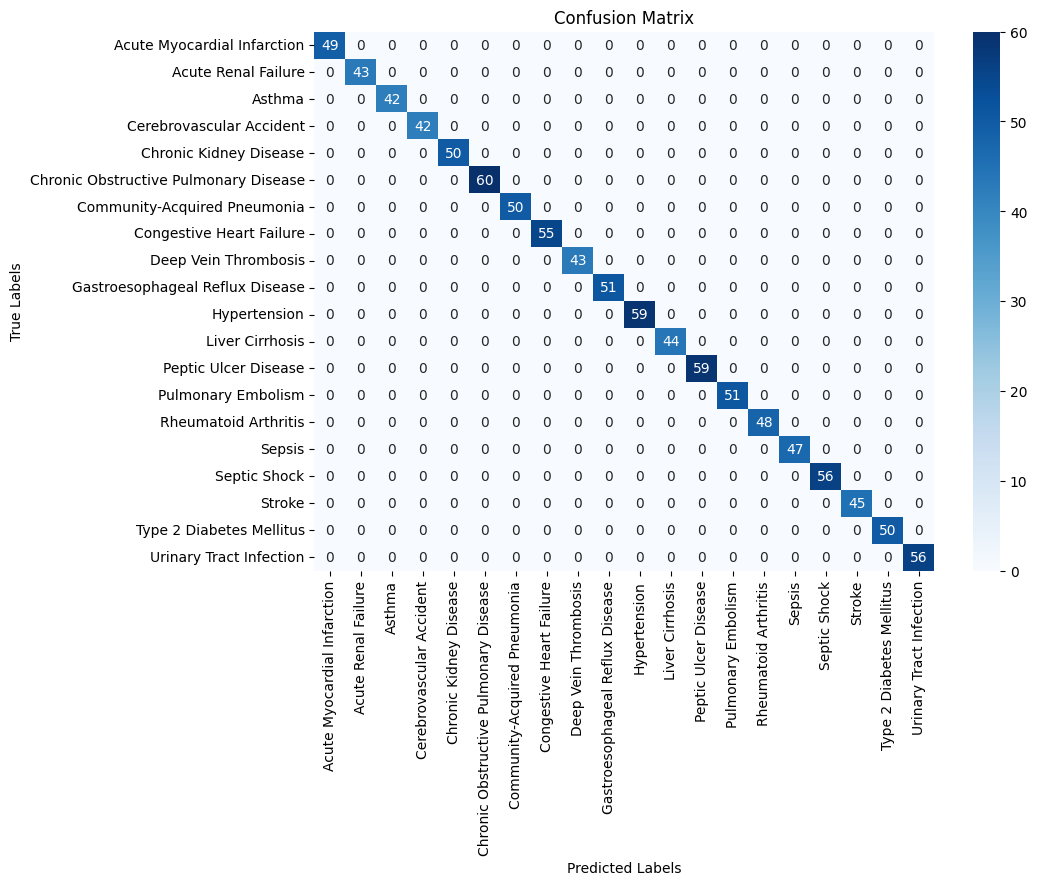

In [24]:
predictions, labels, _ = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)
target_names = [str(label) for label in label_encoder.classes_]
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=target_names))
cm = confusion_matrix(test_labels, predicted_labels)



plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
trainer.save_model('./patient_model')
trainer.save_state()
tokenizer.save_pretrained('./patient_model')

import pickle
pickle.dump(label_encoder, open("label_encoder.pkl", 'wb'))
from transformers import BertForSequenceClassification, BertTokenizer
import pickle

model = BertForSequenceClassification.from_pretrained('./patient_model')
tokenizer = BertTokenizer.from_pretrained('./patient_model')

with open("label_encoder.pkl",'rb') as f:
  label_encoder = pickle.load(f)

In [53]:
import torch

def predict_disease(patientnote,model,label_encoder,clean_text,tokenizer):
  cleaned_note = clean_text(patient_note)

  inputs = tokenizer(
      cleaned_note,
      return_tensors='pt',
      padding=True,
      truncation=True,
  )

  device=torch.device('cuda'if torch.cuda.is_available() else 'cpu')

  inputs={k: v.to (device) for k ,v in inputs.items()}
  model.to(device)
  model.eval()

  with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

  predicted_label=torch.argmax(logits,dim=1).item()


  predicted_disease = label_encoder.inverse_transform([predicted_label])[0]

  return predicted_disease

In [68]:
patient_note = "Patient presents with fever, headache, and fatigue. Medical history includes hypertension."

predicted_disease = predict_disease(
    patient_note,
    model,
    label_encoder,
    clean_text,
    tokenizer
)

print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Acute Renal Failure


In [69]:
import shutil
from google.colab import files

shutil.make_archive('/content/patient_model', 'zip', './patient_model')

files.download('/content/patient_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>